In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
description = pd.read_csv('steamdataset/steam_description_data.csv')
media_data = pd.read_csv('steamdataset/steam_media_data.csv')
requirements_data = pd.read_csv('steamdataset/steam_requirements_data.csv')
support_info = pd.read_csv('steamdataset/steam_support_info.csv')
steam = pd.read_csv('steamdataset/steam.csv')
steam_tag_data = pd.read_csv('steamdataset/steamspy_tag_data.csv')

In [5]:
steam.sample(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
26748,1035890,vApe Escape,2019-03-15,1,Gamechuck,Gamechuck,windows,0,Single-player;Steam Achievements,Adventure;Indie,Adventure;Indie;Science,5,19,2,0,0,0-20000,0.00
1807,241910,Goodbye Deponia,2013-10-17,1,Daedalic Entertainment,Daedalic Entertainment,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Adventure;Indie,Adventure;Point & Click;Comedy,50,1324,163,239,249,200000-500000,16.99
25272,964300,异种战争少女 Alien War Girl,2018-11-14,0,BVRgame,tengenstudio,windows,0,Single-player,Adventure;Casual;Indie;RPG,Sexual Content;Nudity;Adventure,0,141,65,0,0,0-20000,2.89
1632,230290,Universe Sandbox ²,2015-08-24,1,Giant Army,Giant Army,windows;mac;linux,0,Single-player;Partial Controller Support,Casual;Indie;Simulation;Early Access,Early Access;Space;Sandbox,0,5918,377,120,150,200000-500000,19.49
9885,498550,Depths of Dread,2016-07-12,1,Mindmuscle Games,Mindmuscle Games,windows,0,Single-player;Partial Controller Support,Indie;RPG;Strategy,RPG;Indie;Strategy,0,7,7,0,0,0-20000,0.79


appid                0
name                 0
release_date         0
english              0
developer            1
publisher           14
platforms            0
required_age         0
categories           0
genres               0
steamspy_tags        0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
dtype: int64


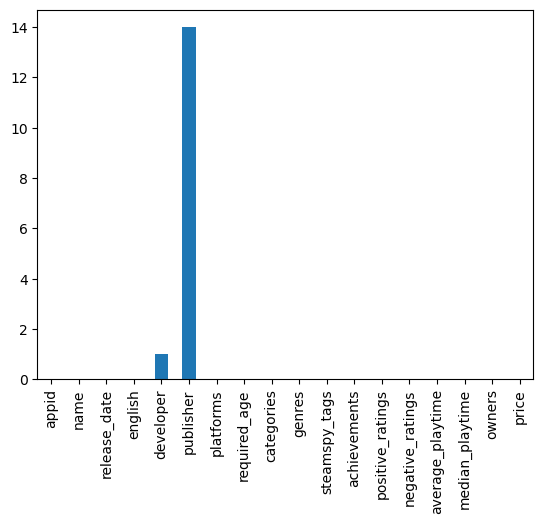

In [6]:
steam_na = steam.isna().sum()
print(steam_na)
steam_na.plot(kind='bar')
plt.show()


In [7]:
# since the number of missing values is small relativ to the dataset , im gonna drop those lines
original_df = steam.dropna() # steam.fillna('Missing')
original_df.isna().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

In [8]:
df = original_df.copy()
df['p_n_rating_ratio'] = np.where(df['negative_ratings'] == 0, np.nan, df['positive_ratings'] / df['negative_ratings']).round(2)
df.head(5)


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,p_n_rating_ratio
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,37.30
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,5.24
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,8.58
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,4.77
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,18.23


In [9]:
(df['price'] == 0).any()

True

In [10]:
def categorize_based_onprice(price):
    if price == 0 :
        return 'Free'
    else :
        return 'Paid'
df['price_category'] = df['price'].apply(categorize_based_onprice)


In [11]:
# take a look on the others data
media_data.sample(3)


,steam_appid,header_image,screenshots,background,movies
11614,545580,https://steamcdn-a.akamaihd.net/steam/apps/545...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/545...,"[{'id': 256673333, 'name': ""GO AWAY, THERE'S K..."
24808,938500,https://steamcdn-a.akamaihd.net/steam/apps/938...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/938...,"[{'id': 256746485, 'name': 'Willowbrooke Post ..."
11925,553340,https://steamcdn-a.akamaihd.net/steam/apps/553...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/553...,"[{'id': 256690004, 'name': 'Launch Trailer', '..."


In [12]:
description.sample(3)

,steam_appid,detailed_description,about_the_game,short_description
3166,298480,Engage in <strong>epic Real Time Strategy</str...,Engage in <strong>epic Real Time Strategy</str...,Engage in epic RTS warfare across 3 huge campa...
6752,400380,"<img src=""https://steamcdn-a.akamaihd.net/stea...","<img src=""https://steamcdn-a.akamaihd.net/stea...",Tactical Soccer The New Season is a turn-based...
1770,238630,Return to the glory days of sidescrolling beat...,Return to the glory days of sidescrolling beat...,Return to the glory days of sidescrolling beat...


In [13]:
steam_media_data = pd.merge(df,media_data,left_on='appid', right_on='steam_appid',how='left').drop(columns=['steam_appid'])
final_merged_df = pd.merge(steam_media_data,description,left_on='appid', right_on='steam_appid',how='left').drop(columns=['steam_appid'])
final_merged_df.sample(3).T

,12397,5144,25325
appid,567150,357190,967130
name,Mosaics Galore,ULTIMATE MARVEL VS. CAPCOM 3,XWidget
release_date,2018-07-27,2017-03-06,2018-11-19
english,1,1,1
developer,Creobit,"CAPCOM CO., LTD.",XWidgetSoft
publisher,8Floor,"CAPCOM U.S.A., INC.",XWidgetSoft
platforms,windows;mac,windows,windows
required_age,0,0,0
categories,Single-player;Steam Trading Cards,Single-player;Multi-player;Online Multi-Player...,Single-player;Steam Cloud;Includes level editor
genres,Casual,Action,Animation & Modeling;Design & Illustration;Uti...


 The Game : Duckumentary is Paid and has the following PNR-Ratio 2.0  


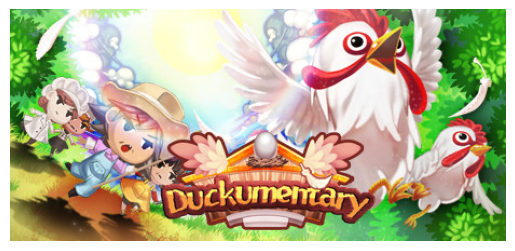

 The Game : Spoiler Alert is Paid and has the following PNR-Ratio 2.93  


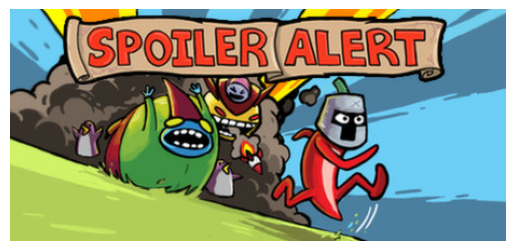

 The Game : Solarix is Paid and has the following PNR-Ratio 1.8  


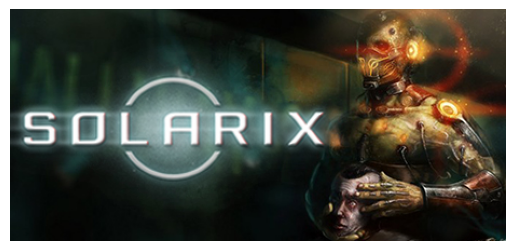

 The Game : Pahelika: Secret Legends is Paid and has the following PNR-Ratio 0.76  


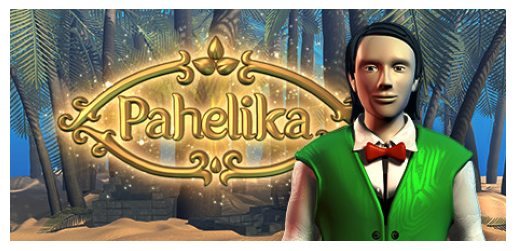

 The Game : Tank Hero VR is Paid and has the following PNR-Ratio 1.38  


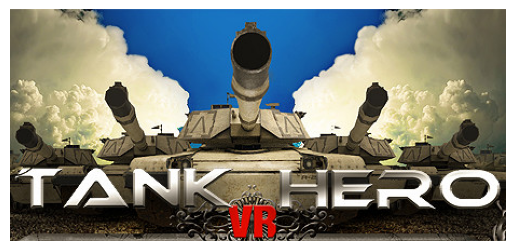

In [14]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
for index, row in final_merged_df.sample(5).iterrows():
    print(f" The Game : {row['name']} is {row['price_category']} and has the following PNR-Ratio {row['p_n_rating_ratio']}  ")
    response = requests.get(row['header_image'])
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    plt.axis('off')  
    plt.show()

In [15]:
#https://huggingface.co/WhereIsAI/UAE-Large-V1
from angle_emb import AnglE, Prompts
from sklearn.metrics.pairwise import cosine_distances
angle = AnglE.from_pretrained('WhereIsAI/UAE-Large-V1', pooling_strategy='cls').cuda()
doc_vecs = angle.encode([
    'The weather is great!',
    'The weather is very good!',
    'i am going to bed'
], normalize_embedding=True)
cosine_distances(doc_vecs)

/home/basheppo/anaconda3/envs/badr_env/lib/python3.12/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
/home/basheppo/anaconda3/envs/badr_env/lib/python3.12/site-packages/torch/cuda/__init__.py:716: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/basheppo/anaconda3/envs/badr_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not f

array([[0.        , 0.04937881, 0.6565592 ],
       [0.04937881, 0.        , 0.650071  ],
       [0.6565592 , 0.650071  , 0.        ]], dtype=float32)

In [16]:
description_embedding = angle.encode(final_merged_df['short_description'].to_list()[:100])
description_embedding.shape

(100, 1024)

In [17]:
# I need to remove the HTML tags from the description as they may impact the embeddings
from bs4 import BeautifulSoup
def clean_html(text):
    if pd.notnull(text):  
        return BeautifulSoup(text, 'html.parser').get_text()
    return text

final_merged_df['detailed_description'] = final_merged_df['detailed_description'].apply(clean_html)
final_merged_df.tail(5).T


/tmp/ipykernel_51662/2628605041.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, 'html.parser').get_text()


,27056,27057,27058,27059,27060
appid,1065230,1065570,1065650,1066700,1069460
name,Room of Pandora,Cyber Gun,Super Star Blast,New Yankee 7: Deer Hunters,Rune Lord
release_date,2019-04-24,2019-04-23,2019-04-24,2019-04-17,2019-04-24
english,1,1,1,1,1
developer,SHEN JIAWEI,Semyon Maximov,EntwicklerX,Yustas Game Studio,Adept Studios GD
publisher,SHEN JIAWEI,BekkerDev Studio,EntwicklerX,Alawar Entertainment,Alawar Entertainment
platforms,windows,windows,windows,windows;mac,windows;mac
required_age,0,0,0,0,0
categories,Single-player;Steam Achievements,Single-player,Single-player;Multi-player;Co-op;Shared/Split ...,Single-player;Steam Cloud,Single-player;Steam Cloud
genres,Adventure;Casual;Indie,Action;Adventure;Indie,Action;Casual;Indie,Adventure;Casual;Indie,Adventure;Casual;Indie


In [18]:
# im gonna take only the first 1000 based on postive negative ratio and num of owners
own_description = []
for idx,row in final_merged_df.iterrows():
    des = f"Game name : {row['name']} Developer {row['genres']} Summary : {row['detailed_description']} "
    own_description.append(des)
final_merged_df['own_description'] = own_description
final_merged_df.sample(3)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,p_n_rating_ratio,price_category,header_image,screenshots,background,movies,detailed_description,about_the_game,short_description,own_description
25761,985510,Necken,2019-01-31,1,Joccish,Joccish,windows,0,Single-player,Adventure;Indie;Early Access,...,NaN,Paid,https://steamcdn-a.akamaihd.net/steam/apps/985...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/985...,"[{'id': 256740853, 'name': 'Necken Early Acces...","Deforest, plunder and kill. Leave no stone unt...","<strong>Deforest, plunder and kill. Leave no s...","Explore, collect resources and craft your way ...",Game name : Necken Developer Adventure;Indie;E...
7709,431470,Inside The Code,2016-01-08,1,CPsoft,CPsoft,windows,0,Single-player,Adventure;RPG;Strategy;Early Access,...,0.00,Paid,https://steamcdn-a.akamaihd.net/steam/apps/431...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/431...,"[{'id': 256659549, 'name': 'Inside The Code - ...",Someone has sneaked in your house during the n...,Someone has sneaked in your house during the n...,Inside The Code is a puzzle/action game. Fight...,Game name : Inside The Code Developer Adventur...
7524,425220,One Piece Burning Blood,2016-09-01,1,"Spike Chunsoft Co., Ltd.",BANDAI NAMCO Entertainment,windows,0,Single-player;Multi-player;Steam Achievements;...,Action,...,3.03,Paid,https://steamcdn-a.akamaihd.net/steam/apps/425...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/425...,"[{'id': 256658898, 'name': 'PEGI_One Piece Bur...",Gold EditionThis amazing ONE PIECE BURNING BLO...,One Piece Burning Blood is a dynamic and colou...,The game that all One Piece fans have been wai...,Game name : One Piece Burning Blood Developer ...


In [19]:
final_merged_df['min_owners'] = final_merged_df['owners'].apply(lambda n : int(n.split('-')[0]))
final_merged_df.sample(3).T

,2366,25661,7170
appid,267530,981310,413030
name,The LEGO® Movie - Videogame,Ishmael,Mytheon
release_date,2014-02-27,2018-12-10,2015-12-08
english,1,1,1
developer,TT Fusion;Traveller's Tales;Feral Interactive ...,Jordan Magnuson,Petroglyph
publisher,Warner Bros. Interactive Entertainment;Feral I...,Jordan Magnuson,Petroglyph
platforms,windows,windows,windows
required_age,0,0,0
categories,Single-player;Shared/Split Screen;Steam Achiev...,Single-player,Single-player;Multi-player;MMO;Co-op
genres,Action;Adventure,Adventure;Casual;Free to Play;Indie;RPG;Simula...,Action;Adventure;RPG


In [20]:
df = final_merged_df.sort_values(['min_owners','p_n_rating_ratio'],ascending=[False,False]).iloc[:1000]
df.sample(3)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,price_category,header_image,screenshots,background,movies,detailed_description,about_the_game,short_description,own_description,min_owners
2312,265210,Viscera Cleanup Detail: Santa's Rampage,2013-12-13,1,RuneStorm,RuneStorm,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Gore;Indie;Simulation,...,Paid,https://steamcdn-a.akamaihd.net/steam/apps/265...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/265...,"[{'id': 2030429, 'name': 'Launch trailer', 'th...","Tragedy! Santa; the toy giving folk-hero, and ...","Tragedy! Santa; the toy giving folk-hero, and ...","Tragedy! Santa; the toy giving folk-hero, and ...",Game name : Viscera Cleanup Detail: Santa's Ra...,500000
133,4570,"Warhammer® 40,000: Dawn of War® - Game of the ...",2007-08-07,1,Relic Entertainment,SEGA,windows,16,Single-player;Multi-player;Steam Trading Cards...,Strategy,...,Paid,https://steamcdn-a.akamaihd.net/steam/apps/457...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/457...,"[{'id': 2040624, 'name': 'Dawn of War', 'thumb...",ReviewsAbout the GamePrepare yourself for the ...,"Prepare yourself for the grim, dark future of ...","Prepare yourself for the grim, dark future of ...","Game name : Warhammer® 40,000: Dawn of War® - ...",1000000
5878,375950,Viridi,2015-08-19,1,Zoe Vartanian;Badru;Isa Hutchinson;Michael Bell,Ice Water Games,windows;mac;linux,0,Single-player;Steam Cloud,Casual;Free to Play;Indie;Simulation,...,Free,https://steamcdn-a.akamaihd.net/steam/apps/375...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/375...,"[{'id': 256655562, 'name': 'Viridi Steam Tease...",Nurture a small pot of succulents that grow in...,Nurture a small pot of succulents that grow in...,Nurture a small pot of succulents that grow in...,Game name : Viridi Developer Casual;Free to Pl...,500000


In [21]:
df.to_csv('games_dataset.csv',index=False)

In [22]:
df['own_description'].iloc[0]

"Game name : Dota 2 Developer Action;Free to Play;Strategy Summary : The most-played game on Steam.Every day, millions of players worldwide enter battle as one of over a hundred Dota heroes. And no matter if it's their 10th hour of play or 1,000th, there's always something new to discover. With regular updates that ensure a constant evolution of gameplay, features, and heroes, Dota 2 has truly taken on a life of its own.One Battlefield. Infinite Possibilities.When it comes to diversity of heroes, abilities, and powerful items, Dota boasts an endless array—no two games are the same. Any hero can fill multiple roles, and there's an abundance of items to help meet the needs of each game. Dota doesn't provide limitations on how to play, it empowers you to express your own style.All heroes are free.Competitive balance is Dota's crown jewel, and to ensure everyone is playing on an even field, the core content of the game—like the vast pool of heroes—is available to all players. Fans can coll

In [23]:
batches = np.array_split(df['own_description'],100)
embs = []
for index,chunk in enumerate(batches):
    print(f"{index} /{len(batches)}")
    embs += list(angle.encode(list(chunk),to_numpy=True))
    
embs

/home/basheppo/anaconda3/envs/badr_env/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


0 /100
1 /100
2 /100
3 /100
4 /100
5 /100
6 /100
7 /100
8 /100
9 /100
10 /100
11 /100
12 /100
13 /100
14 /100
15 /100
16 /100
17 /100
18 /100
19 /100
20 /100
21 /100
22 /100
23 /100
24 /100
25 /100
26 /100
27 /100
28 /100
29 /100
30 /100
31 /100
32 /100
33 /100
34 /100
35 /100
36 /100
37 /100
38 /100
39 /100
40 /100
41 /100
42 /100
43 /100
44 /100
45 /100
46 /100
47 /100
48 /100
49 /100
50 /100
51 /100
52 /100
53 /100
54 /100
55 /100
56 /100
57 /100
58 /100
59 /100
60 /100
61 /100
62 /100
63 /100
64 /100
65 /100
66 /100
67 /100
68 /100
69 /100
70 /100
71 /100
72 /100
73 /100
74 /100
75 /100
76 /100
77 /100
78 /100
79 /100
80 /100
81 /100
82 /100
83 /100
84 /100
85 /100
86 /100
87 /100
88 /100
89 /100
90 /100
91 /100
92 /100
93 /100
94 /100
95 /100
96 /100
97 /100
98 /100
99 /100


[array([-0.22951744,  0.58372337, -0.44713852, ..., -0.13024245,
        -0.5841446 , -0.08106409], dtype=float32),
 array([-0.2368222 ,  0.33354628, -0.53209907, ..., -0.43901363,
        -0.7710132 , -0.08894142], dtype=float32),
 array([ 0.07501645, -0.04648224, -1.0076524 , ...,  0.40983364,
        -0.32858208, -0.14467534], dtype=float32),
 array([ 0.3740081 ,  0.23591323, -0.7328936 , ...,  0.06667129,
        -0.2949266 , -0.21232887], dtype=float32),
 array([-0.08392613,  0.36166304, -0.40562782, ...,  0.302865  ,
         0.02364924, -0.03827479], dtype=float32),
 array([ 0.46075487,  0.40085346, -0.81367683, ...,  0.23263626,
        -0.06314594, -0.04828376], dtype=float32),
 array([ 0.13307862,  0.5008913 , -0.43488166, ..., -0.94316876,
        -0.15345906, -0.38086084], dtype=float32),
 array([-0.00844502,  0.3509566 , -0.5967606 , ..., -0.6304704 ,
        -0.27047688, -0.16768326], dtype=float32),
 array([ 0.2254834 ,  0.64747083, -0.82207966, ..., -0.3475926 ,
       

In [24]:
embs_array = np.array(embs)
embs_array[0]

array([-0.22951744,  0.58372337, -0.44713852, ..., -0.13024245,
       -0.5841446 , -0.08106409], dtype=float32)

In [25]:
df = df.reset_index(drop=True)  

In [26]:
embs_df = pd.DataFrame(columns=['appid','embedding'])
for index,row in df.iterrows():
    embs_df.loc[index] = [row['appid'],embs_array[index]]
    
embs_df.head(10)

,appid,embedding
0,570,"[-0.22951744, 0.58372337, -0.44713852, 0.18876..."
1,730,"[-0.2368222, 0.33354628, -0.53209907, 1.070328..."
2,578080,"[0.075016454, -0.04648224, -1.0076524, 0.79741..."
3,440,"[0.3740081, 0.23591323, -0.7328936, 1.1004307,..."
4,230410,"[-0.083926134, 0.36166304, -0.40562782, 1.1448..."
5,304930,"[0.46075487, 0.40085346, -0.81367683, 0.391137..."
6,620,"[0.13307862, 0.5008913, -0.43488166, 0.6240071..."
7,400,"[-0.008445021, 0.3509566, -0.5967606, 0.610676..."
8,10,"[0.2254834, 0.64747083, -0.82207966, 0.7184821..."
9,550,"[0.31777412, -0.18552543, -0.18458065, 0.45051..."


In [27]:
embs_df.to_csv('embeddings.csv',index=False)

In [28]:
game_name = 'Deathmatch Classic'
game_id = df[df['name']==game_name]['appid'].item()
game_emb = embs_df[embs_df['appid']==game_id]['embedding'].item()
game_emb

array([ 0.45529896,  0.03786704,  0.15728633, ..., -0.37426436,
       -0.92767024, -0.37576532], dtype=float32)

In [29]:
print(embs_array.shape)
print(game_emb.shape)

(1000, 1024)
(1024,)


In [30]:
game_emb = game_emb.reshape(1,1024)
game_emb.shape

(1, 1024)

In [31]:
distances = cosine_distances(game_emb,embs_array)


In [32]:
min_distances_idx = distances.argsort()
min_distances_idx.shape

(1, 1000)

In [33]:
distances = distances.reshape(1000)
distances[min_distances_idx.reshape(1000)]

array([0.        , 0.25775814, 0.27921373, 0.30305934, 0.31754363,
       0.33844173, 0.34438217, 0.3501426 , 0.35064346, 0.3512479 ,
       0.35138315, 0.35196996, 0.35370016, 0.36177713, 0.36235666,
       0.36242855, 0.36264467, 0.36278605, 0.36458522, 0.36746204,
       0.3683821 , 0.3713314 , 0.37142205, 0.37506723, 0.3753543 ,
       0.3756107 , 0.3758223 , 0.37600183, 0.37819594, 0.37896705,
       0.37944913, 0.38167858, 0.38253844, 0.38272166, 0.3830191 ,
       0.38316655, 0.38590276, 0.38695395, 0.38728285, 0.38751996,
       0.38774598, 0.3879696 , 0.38886654, 0.38892084, 0.3889867 ,
       0.3891768 , 0.39066553, 0.3915062 , 0.3929249 , 0.3929615 ,
       0.39427352, 0.3943348 , 0.3954671 , 0.396321  , 0.3978799 ,
       0.39861405, 0.39892244, 0.3990755 , 0.3993591 , 0.4004007 ,
       0.40103102, 0.4021274 , 0.40262127, 0.40283918, 0.40293604,
       0.40296543, 0.4035082 , 0.4047749 , 0.40578127, 0.4061246 ,
       0.40615892, 0.40624428, 0.4065116 , 0.4067136 , 0.40703

In [34]:
# joining the two dfs 
ready_df = pd.merge(df,embs_df,left_on='appid',right_on='appid',how='left')
ready_df.head(5)
    
    

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,header_image,screenshots,background,movies,detailed_description,about_the_game,short_description,own_description,min_owners,embedding
0,570,Dota 2,2013-07-09,1,Valve,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,...,https://steamcdn-a.akamaihd.net/steam/apps/570...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/570...,"[{'id': 256692021, 'name': 'Dota 2 - Join the ...","The most-played game on Steam.Every day, milli...",<strong>The most-played game on Steam.</strong...,"Every day, millions of players worldwide enter...",Game name : Dota 2 Developer Action;Free to Pl...,100000000,"[-0.22951744, 0.58372337, -0.44713852, 0.18876..."
1,730,Counter-Strike: Global Offensive,2012-08-21,1,Valve;Hidden Path Entertainment,Valve,windows;mac;linux,0,Multi-player;Steam Achievements;Full controlle...,Action;Free to Play,...,https://steamcdn-a.akamaihd.net/steam/apps/730...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/730...,"[{'id': 81958, 'name': 'CS:GO Trailer Long', '...",Counter-Strike: Global Offensive (CS: GO) expa...,Counter-Strike: Global Offensive (CS: GO) expa...,Counter-Strike: Global Offensive (CS: GO) expa...,Game name : Counter-Strike: Global Offensive D...,50000000,"[-0.2368222, 0.33354628, -0.53209907, 1.070328..."
2,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,1,PUBG Corporation,PUBG Corporation,windows,0,Multi-player;Online Multi-Player;Stats,Action;Adventure;Massively Multiplayer,...,https://steamcdn-a.akamaihd.net/steam/apps/578...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/578...,"[{'id': 256737984, 'name': 'Vikendi CGI Traile...",PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,<strong>PLAYERUNKNOWN'S BATTLEGROUNDS</strong>...,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,Game name : PLAYERUNKNOWN'S BATTLEGROUNDS Deve...,50000000,"[0.075016454, -0.04648224, -1.0076524, 0.79741..."
3,440,Team Fortress 2,2007-10-10,1,Valve,Valve,windows;mac;linux,0,Multi-player;Cross-Platform Multiplayer;Steam ...,Action;Free to Play,...,https://steamcdn-a.akamaihd.net/steam/apps/440...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/440...,"[{'id': 256698790, 'name': 'Jungle Inferno', '...",The Jungle Inferno UpdatePlay the all-new Jung...,"<p><strong>""The most fun you can have online""<...",Nine distinct classes provide a broad range of...,Game name : Team Fortress 2 Developer Action;F...,20000000,"[0.3740081, 0.23591323, -0.7328936, 1.1004307,..."
4,230410,Warframe,2013-03-25,1,Digital Extremes,Digital Extremes,windows,16,Single-player;Multi-player;Co-op;Steam Trading...,Action;Free to Play,...,https://steamcdn-a.akamaihd.net/steam/apps/230...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/230...,"[{'id': 256734984, 'name': 'Fortuna Update Tra...",Just UpdatedBAND TOGETHER TO SAVE THE VALLISWi...,"<img src=""https://steamcdn-a.akamaihd.net/stea...",Warframe is a cooperative free-to-play third p...,Game name : Warframe Developer Action;Free to ...,20000000,"[-0.083926134, 0.36166304, -0.40562782, 1.1448..."


In [35]:
ready_df.to_csv('final_dataset.csv',index=False)

In [38]:
# get top 10 recommandations :
top_10_index = min_distances_idx.reshape(1000)
# check the results 
top_10_df = ready_df.iloc[top_10_index][:10]
top_10_df

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,header_image,screenshots,background,movies,detailed_description,about_the_game,short_description,own_description,min_owners,embedding
53,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,https://steamcdn-a.akamaihd.net/steam/apps/40/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/40/...,NaN,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Game name : Deathmatch Classic Developer Actio...,5000000,"[0.45529896, 0.03786704, 0.15728633, 0.9570523..."
16,320,Half-Life 2: Deathmatch,2004-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled;Includes...,Action,...,https://steamcdn-a.akamaihd.net/steam/apps/320...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/320...,NaN,Fast multiplayer action set in the Half-Life 2...,Fast multiplayer action set in the Half-Life 2...,Fast multiplayer action set in the Half-Life 2...,Game name : Half-Life 2: Deathmatch Developer ...,10000000,"[0.6117972, 0.08541945, -0.10752636, 0.3418728..."
65,360,Half-Life Deathmatch: Source,2006-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,https://steamcdn-a.akamaihd.net/steam/apps/360...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/360...,NaN,Half-Life Deathmatch: Source is a recreation o...,Half-Life Deathmatch: Source is a recreation o...,Half-Life Deathmatch: Source is a recreation o...,Game name : Half-Life Deathmatch: Source Devel...,5000000,"[0.75592345, -0.24845369, -0.09910992, 0.34908..."
194,282440,Quake Live™,2014-09-17,1,id Software,Bethesda Softworks,windows,0,Single-player;Multi-player;Steam Achievements;...,Action,...,https://steamcdn-a.akamaihd.net/steam/apps/282...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/282...,"[{'id': 256657736, 'name': '2015 Steam Exclusi...",From the legendary series that founded the onl...,From the legendary series that founded the onl...,From the legendary series that founded the onl...,Game name : Quake Live™ Developer Action Summa...,2000000,"[0.2901142, 0.36290163, -0.8306485, 1.5760789,..."
115,379720,DOOM,2016-05-12,1,id Software,Bethesda Softworks,windows,18,Single-player;Multi-player;Co-op;Steam Achieve...,Action,...,https://steamcdn-a.akamaihd.net/steam/apps/379...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/379...,"[{'id': 256664074, 'name': 'DOOM Launch Traile...",2016 Game Awards WinnerAbout the GameDeveloped...,"Developed by id software, the studio that pion...",Now includes all three premium DLC packs (Unto...,Game name : DOOM Developer Action Summary : 20...,2000000,"[0.47402483, -0.004297249, -0.164921, 0.854642..."
127,317360,Double Action: Boogaloo,2014-10-23,1,Double Action Factory,Double Action Factory,windows;linux,0,Multi-player;Cross-Platform Multiplayer;VR Sup...,Action;Free to Play;Indie,...,https://steamcdn-a.akamaihd.net/steam/apps/317...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/317...,"[{'id': 2033797, 'name': 'Launch Trailer', 'th...",Double Action is a free stylish multiplayer ga...,Double Action is a free stylish multiplayer ga...,Double Action is a free stylish multiplayer ga...,Game name : Double Action: Boogaloo Developer ...,2000000,"[0.5890312, 0.7542145, -0.13771532, 1.3624303,..."
726,323850,Move or Die,2016-01-21,1,Those Awesome Guys,Those Awesome Guys,windows;mac;linux,0,Single-player;Multi-player;Shared/Split Screen...,Action;Indie,...,https://steamcdn-a.akamaihd.net/steam/apps/323...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https: